In [ ]:
#NFL 2023 Data Analysis Project
#Project Main Goal: Find the average yards gained per team on offense and summarize in a graph.

In [2]:
# import all necessary tools to do proper analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# import the csv data file to be read by python pandas
pbp_2023 = pd.read_csv('pbp-2023.csv')

# Let's see what the first few rows of our data looks like and what columns we're working with
print(pbp_2023.head())
print(pbp_2023.columns)

       GameId    GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
0  2023121101  12/11/2023        3       1      28         NYG          GB   
1  2023121101  12/11/2023        3       1      35         NYG          GB   
2  2023121101  12/11/2023        3       2      19         NYG          GB   
3  2023121101  12/11/2023        3       2      56         NYG          GB   
4  2023121101  12/11/2023        3       3      43         NYG          GB   

   Down  ToGo  YardLine  ...  IsTwoPointConversion  \
0     0     0        85  ...                     0   
1     3     7        92  ...                     0   
2     2    11        88  ...                     0   
3     1    10        89  ...                     0   
4     1    10        64  ...                     0   

   IsTwoPointConversionSuccessful  RushDirection  YardLineFixed  \
0                               0            NaN             15   
1                               0            NaN              8   
2    

In [8]:
# Let's do a quick test with the New York Giant's (NYG)
# Create a variable to pull all the giants data
giants_offense = pbp_2023[pbp_2023['OffenseTeam'] == 'NYG']
# calculation for average yards gained on offense
NYG_avg_gained = np.average(giants_offense['Yards'])
# print the giants average yards gained statistic
print('Giants Average Offensive Yards:', NYG_avg_gained)

Giants Average Offensive Yards: 3.137902559867878


In [21]:
# Let's create a function to do this for each team
# empty list where we will add our team names
team_abbreviated = [] 
# empty list where we will add our team averages
team_averages = [] 
for team in set(pbp_2023['OffenseTeam']):
    #append each team to team_abbreviated list
    teams_abbreviated.append(team)
    #calculate the average per team rounded to 2 decimal points
    average = round(np.average(pbp_2023[pbp_2023['OffenseTeam'] == team]['Yards']), 2)
    print(f'{team} avg. yards per play: {average}')
    #append each team and average to a list with columns Team and Average Yards per Play
    team_averages.append({'Team': team, 'Average Yards per Play': average})

#create a new dataframe from the team_averages list
team_averages_df = pd.DataFrame(team_averages)









DEN avg. yards per play: 3.38
LAC avg. yards per play: 3.67
ARI avg. yards per play: 3.38
NE avg. yards per play: 3.61
IND avg. yards per play: 3.57
BUF avg. yards per play: 4.08
LV avg. yards per play: 3.45
LA avg. yards per play: 3.89
PHI avg. yards per play: 3.9
SF avg. yards per play: 4.58
BAL avg. yards per play: 4.1
PIT avg. yards per play: 3.47
DET avg. yards per play: 4.24
MIN avg. yards per play: 3.99
WAS avg. yards per play: 3.7
MIA avg. yards per play: 4.97
GB avg. yards per play: 3.84
TEN avg. yards per play: 3.35
DAL avg. yards per play: 4.07
HOU avg. yards per play: 3.96
CIN avg. yards per play: 3.59
CAR avg. yards per play: 3.02
CLE avg. yards per play: 3.39
NYJ avg. yards per play: 3.17
JAX avg. yards per play: 3.58
NYG avg. yards per play: 3.14
TB avg. yards per play: 3.55
ATL avg. yards per play: 3.63
NO avg. yards per play: 3.72
SEA avg. yards per play: 3.77
KC avg. yards per play: 4.25
CHI avg. yards per play: 3.67


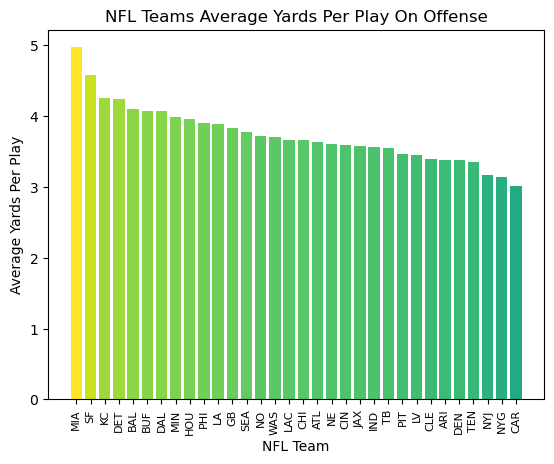

<Figure size 640x480 with 0 Axes>

In [36]:
#let's create a bar graph of all of the team's average yards per play
team_averages_df_sorted = team_averages_df.sort_values(by='Average Yards per Play', ascending=False)
colors = plt.cm.viridis(team_averages_df_sorted['Average Yards per Play'] / max(team_averages_df_sorted['Average Yards per Play']))

ax= plt.subplot()
plt.bar(x=team_averages_df_sorted['Team'], height= team_averages_df_sorted['Average Yards per Play'], color=colors)
plt.xlabel('NFL Team')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Average Yards Per Play')
plt.title('NFL Teams Average Yards Per Play On Offense')
plt.show()
plt.clf()